In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\mj\anaconda3\envs\python_seaborn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(15).to_frame()

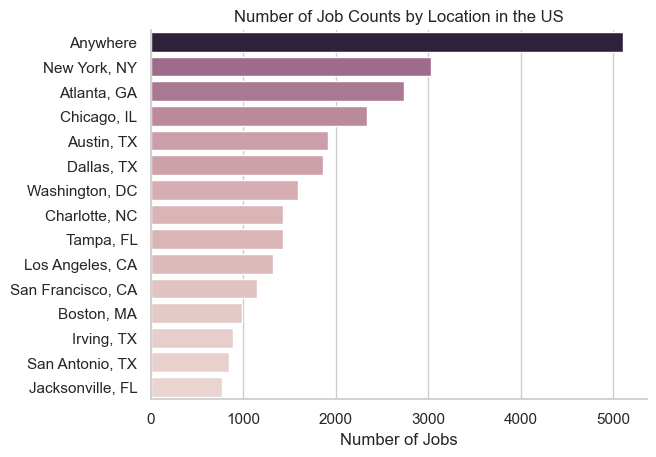

In [4]:
sns.set_theme(style= 'whitegrid')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', legend=False)
sns.despine()
plt.title('Number of Job Counts by Location in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout
plt.show()

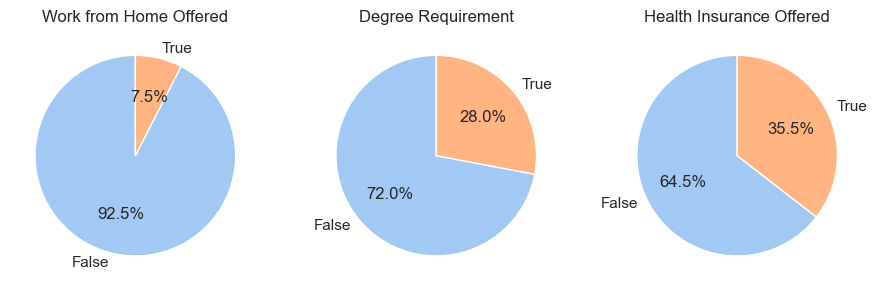

In [5]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    colors = sns.color_palette('pastel')
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors=colors)
    ax[i].set_title(title)

plt.show()

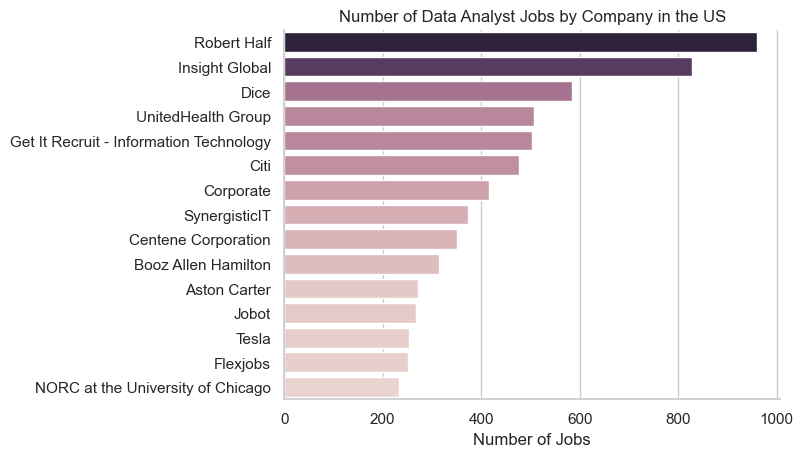

In [6]:
df_plot = df_DA_US['company_name'].value_counts().head(15).to_frame()
sns.set_theme(style= 'whitegrid')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', legend=False)
sns.despine()
plt.title('Number of Data Analyst Jobs by Company in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout
plt.show()
